In [1]:
from matplotlib import pyplot as plt
from tiler import Tiler, Merger
import numpy as np
import cv2

/opt/homebrew/anaconda3/envs/vesuvius-challenge-ink-detection-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_path = '../data/raw/train/1/inklabels.png' # inklabels.png or mask.png
tile_size = 2048

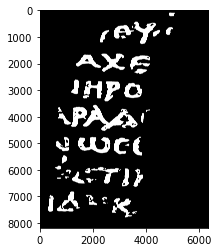

In [3]:
image = cv2.imread(image_path)
plt.imshow(image)

In [4]:
tiler = Tiler(data_shape=image.shape,
              tile_shape=(tile_size, tile_size, 3),
              overlap=0.5,
              channel_dimension=2)

new_shape, padding = tiler.calculate_padding()
tiler.recalculate(data_shape=new_shape)
padded_image = np.pad(image, padding)

merger = Merger(tiler)

/var/folders/7t/wmv4003x5wn3_h0v2h8xdccc0000gn/T/ipykernel_13468/3771311851.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


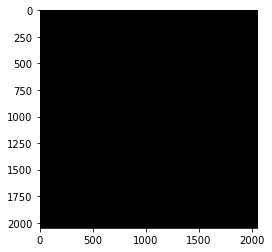

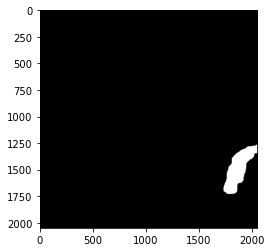

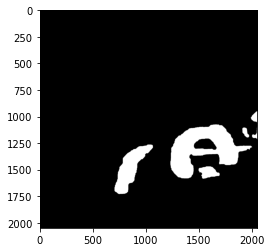

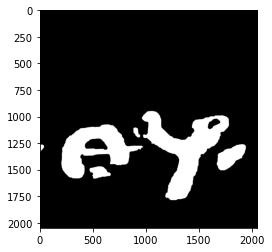

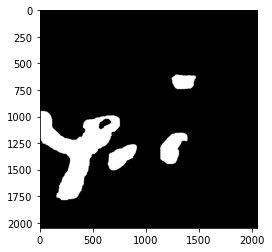

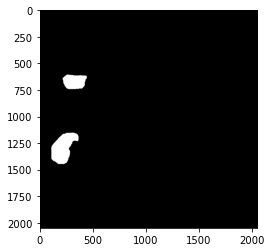

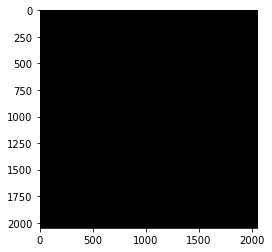

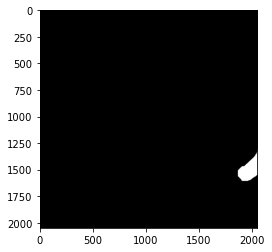

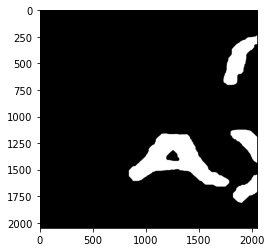

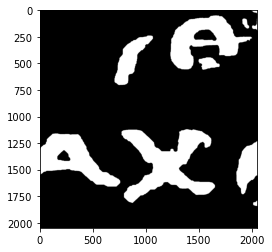

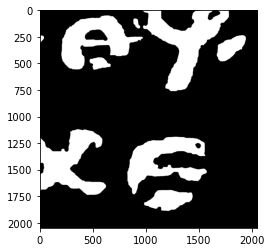

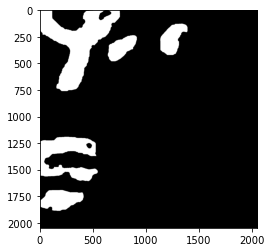

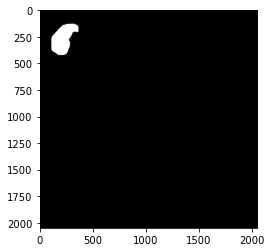

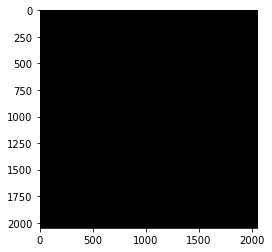

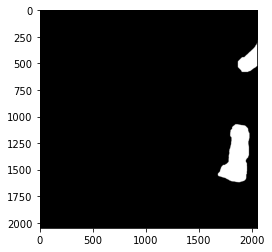

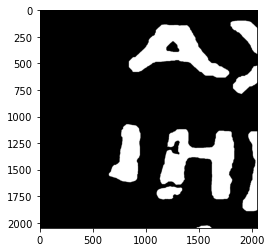

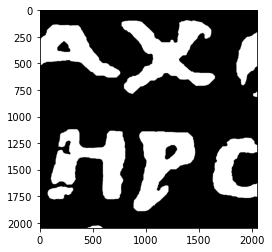

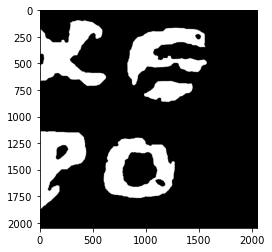

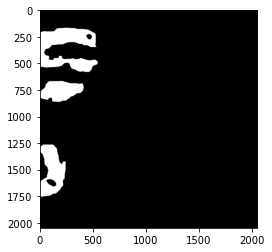

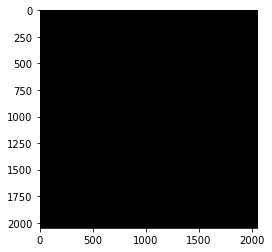

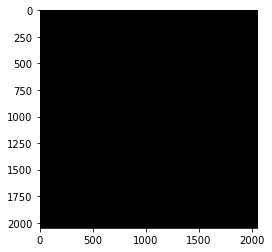

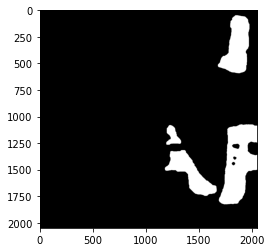

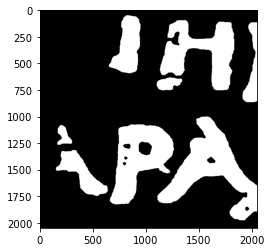

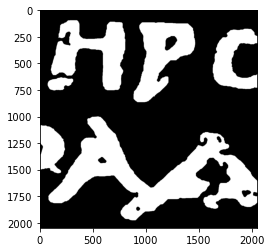

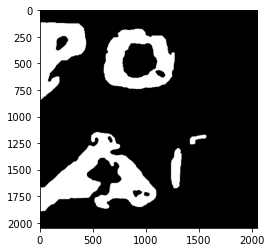

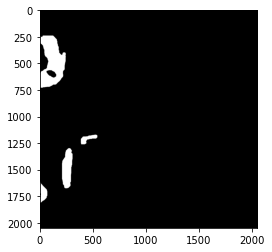

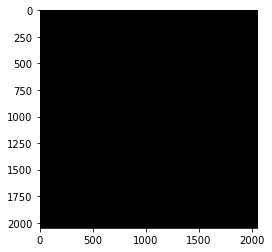

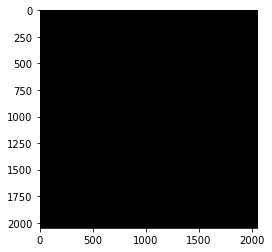

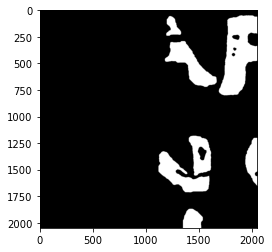

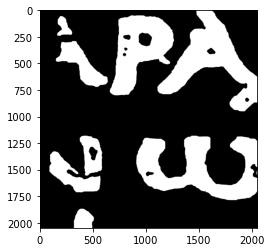

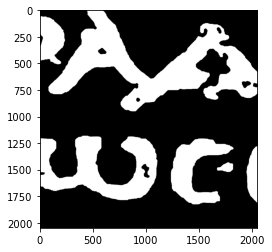

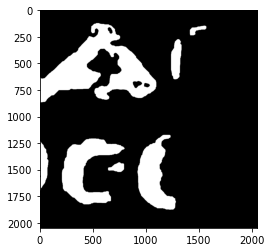

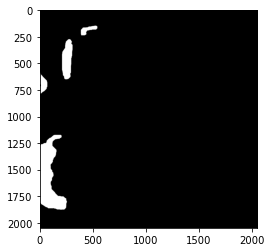

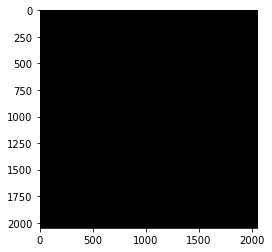

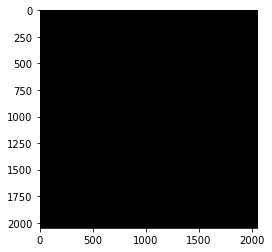

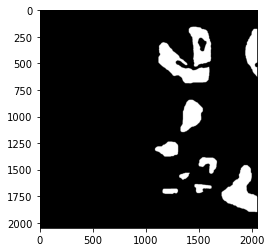

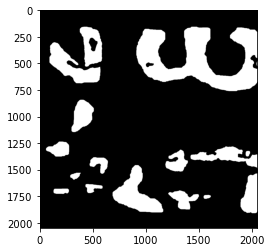

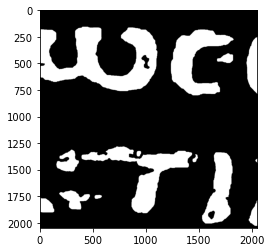

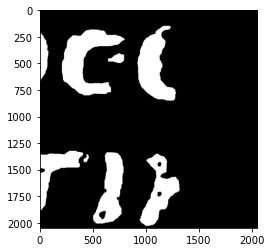

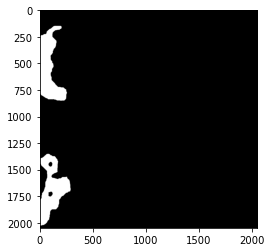

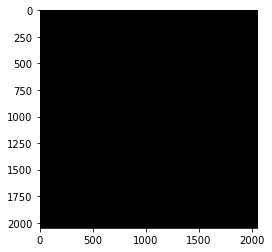

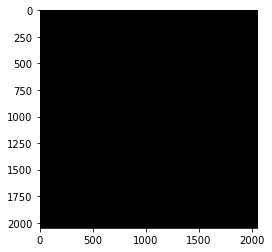

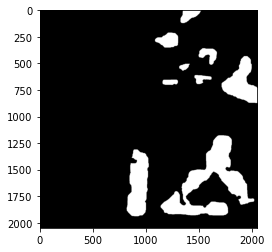

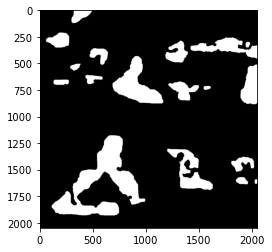

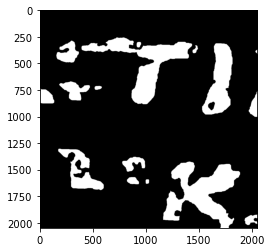

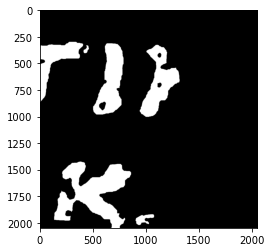

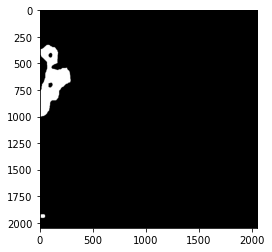

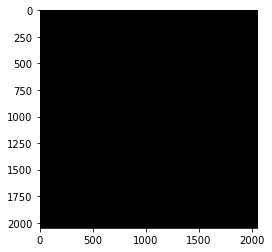

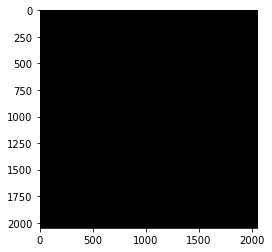

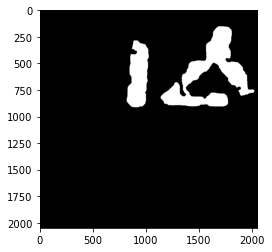

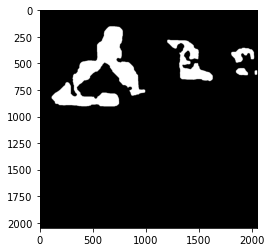

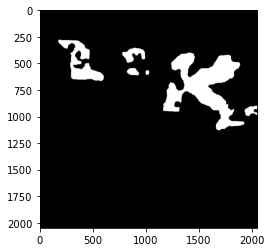

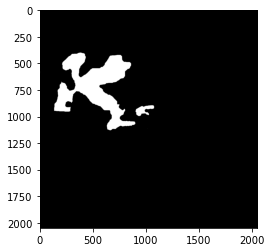

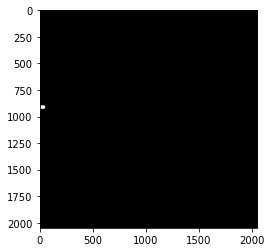

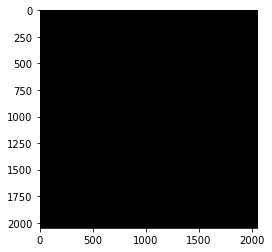

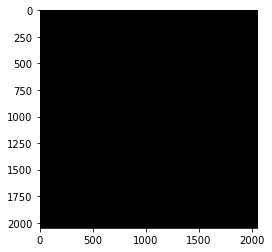

In [5]:
for tile_id, tile in tiler(padded_image):
    plt.figure()
    plt.imshow(tile)

In [6]:
for tile_id, tile in tiler(padded_image):
    merger.add(tile_id, tile)
    
merge_image = merger.merge(extra_padding=padding, dtype=image.dtype)

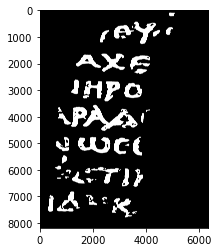

In [7]:
plt.imshow(merge_image)